<a href="https://colab.research.google.com/github/Christoputhanpurackal/machine-learning/blob/main/ml_socialnetworksvmandknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

In [ ]:
dataset = pd.read_csv('/content/Social_Network_Ads (2).csv')

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dataset.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
gender_encoded = label_encoder.fit_transform(dataset['Gender'])
dataset['Gender'] = gender_encoded

In [ ]:
x=dataset.iloc[:,[1,2,3]].values
y=dataset.iloc[:,-1].values

In [ ]:
x

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]])

In [ ]:
dataset.shape

(400, 5)

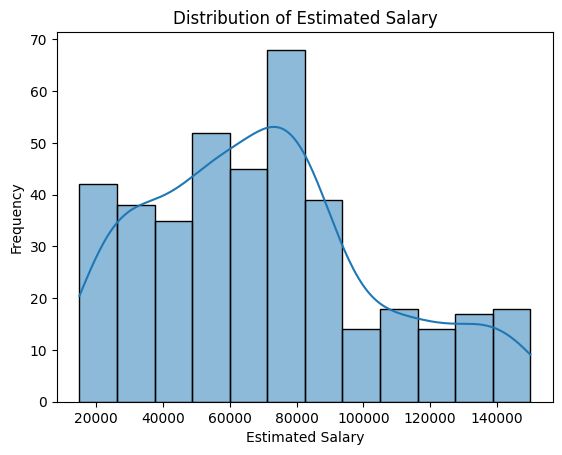

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(dataset['EstimatedSalary'], kde=True)
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

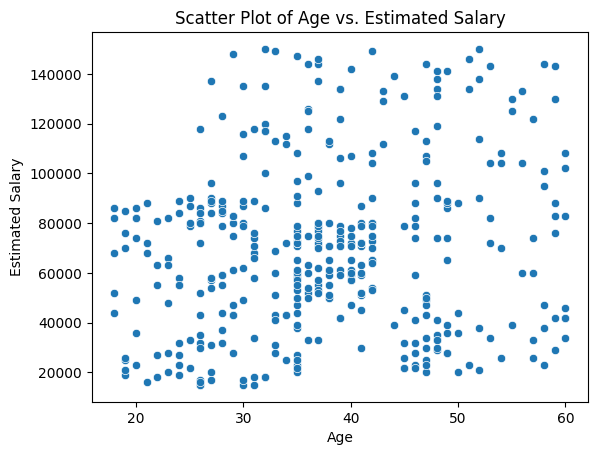

In [ ]:

sns.scatterplot(data=dataset, x='Age', y='EstimatedSalary')
plt.title('Scatter Plot of Age vs. Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

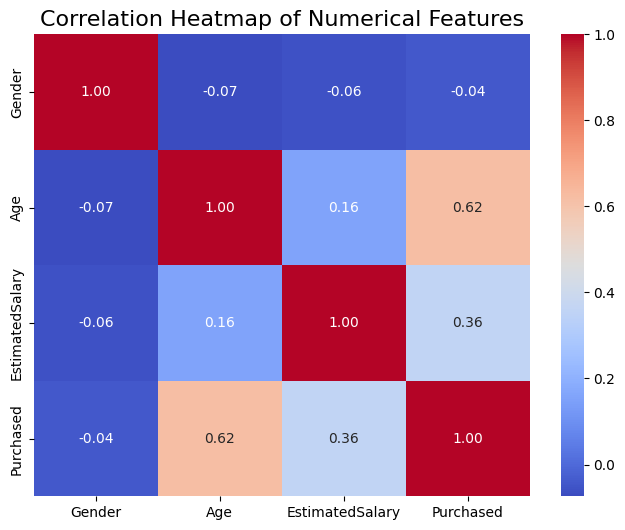

In [ ]:


corr_matrix = dataset.iloc[:,[1,2,3,4]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

TypeError: suptitle() missing 1 required positional argument: 't'

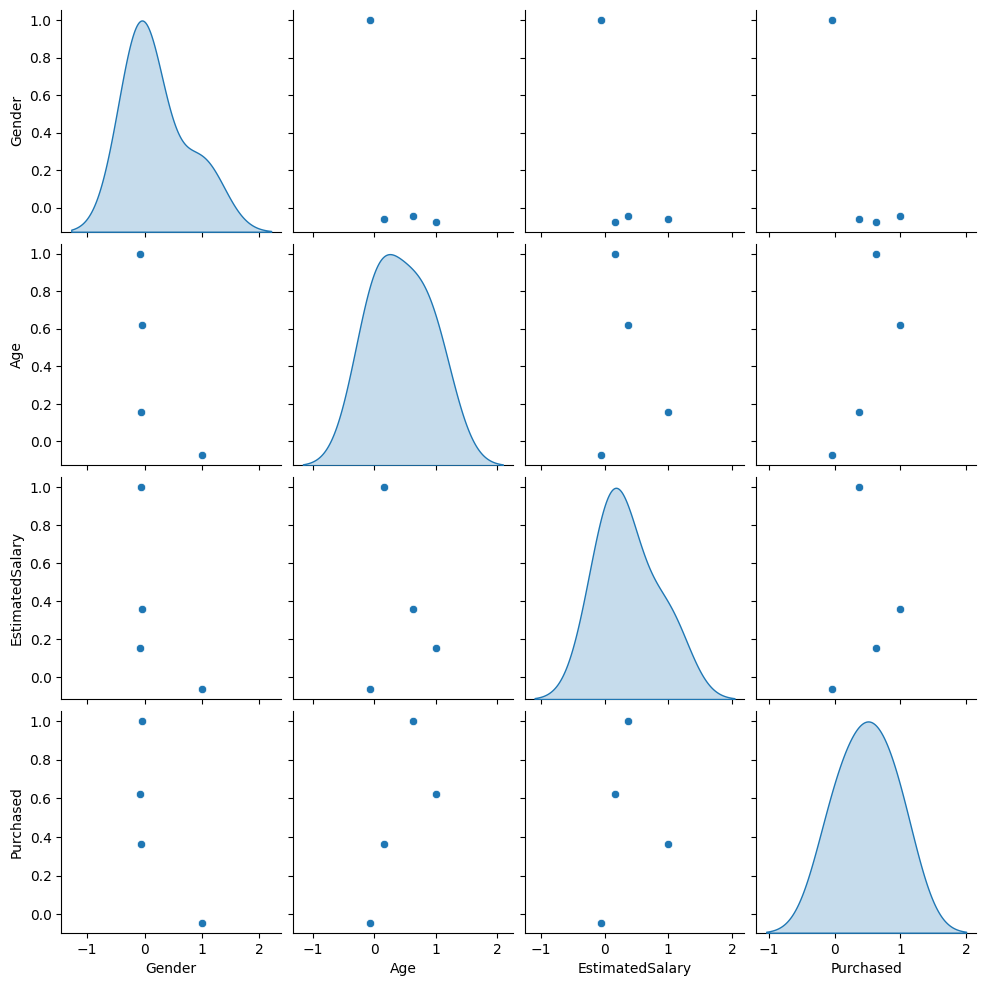

In [ ]:

sns.pairplot(corr_matrix, palette='Set1', diag_kind='kde')
plt.suptitle( y=1.02, fontsize=16)
plt.show()

<ipython-input-95-a72b3da72ca8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='EstimatedSalary', data=dataset, palette='Pastel1')


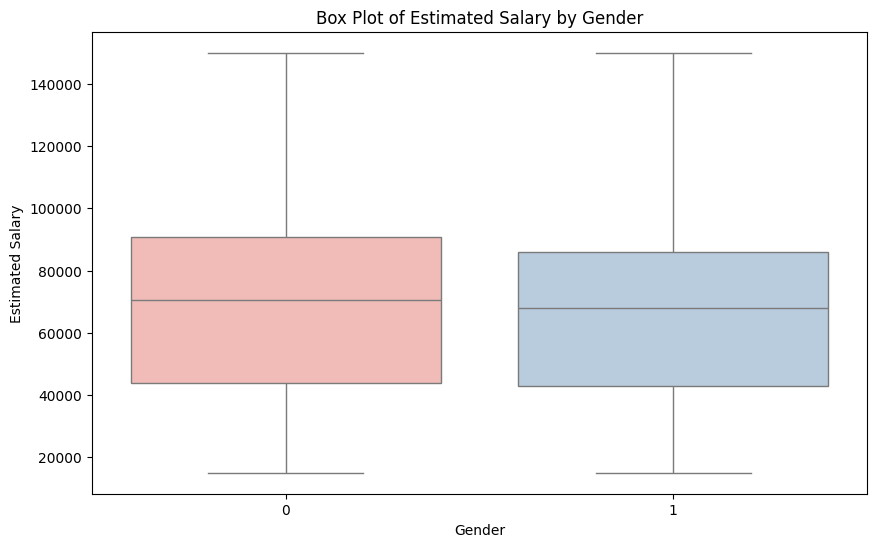

In [ ]:
# Box Plot: Goals by Confederation

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='EstimatedSalary', data=dataset, palette='Pastel1')
plt.title('Box Plot of Estimated Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[ 1.02532046e+00,  1.92295008e+00,  2.14601566e+00],
       [-9.75304830e-01,  2.02016082e+00,  3.78719297e-01],
       [-9.75304830e-01, -1.38221530e+00, -4.32498705e-01],
       [-9.75304830e-01, -1.18779381e+00, -1.01194013e+00],
       [-9.75304830e-01,  1.92295008e+00, -9.25023920e-01],
       [-9.75304830e-01,  3.67578135e-01,  2.91803083e-01],
       [-9.75304830e-01,  1.73156642e-01,  1.46942725e-01],
       [ 1.02532046e+00,  2.02016082e+00,  1.74040666e+00],
       [-9.75304830e-01,  7.56421121e-01, -8.38107706e-01],
       [-9.75304830e-01,  2.70367388e-01, -2.87638347e-01],
       [ 1.02532046e+00,  3.67578135e-01, -1.71750061e-01],
       [-9.75304830e-01, -1.18475597e-01,  2.20395980e+00],
       [-9.75304830e-01, -1.47942605e+00, -6.35303205e-01],
       [ 1.02532046e+00, -1.28500455e+00, -1.06988428e+00],
       [ 1.02532046e+00, -1.38221530e+00,  4.07691369e-01],
       [-9.75304830e-01, -1.09058306e+00,  7.55356227e-01],
       [ 1.02532046e+00, -1.47942605e+00

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score


0.925

In [ ]:
recall_score=recall_score(y_test,y_pred)
recall_score

0.8636363636363636

In [ ]:
f1_score=f1_score(y_test,y_pred)
f1_score

0.8636363636363636

In [ ]:
precision_score=precision_score(y_test,y_pred)
precision_score

0.8636363636363636

In [ ]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[55,  3],
       [ 3, 19]])

In [ ]:
k_values=[i for i in range(1,20)]
scores=[]
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  cv_scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
  scores.append(cv_scores.mean())

In [ ]:
scores

[0.859375,
 0.834375,
 0.8875,
 0.884375,
 0.896875,
 0.884375,
 0.8875,
 0.89375,
 0.896875,
 0.896875,
 0.89375,
 0.89375,
 0.890625,
 0.89375,
 0.890625,
 0.89375,
 0.89375,
 0.890625,
 0.8875]

Text(0, 0.5, 'Accuracy Score')

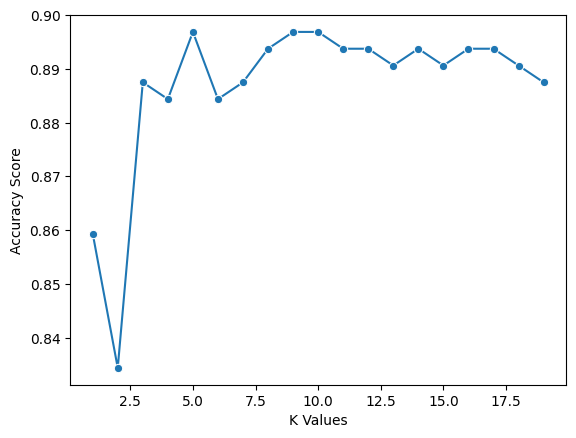

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
best_k

5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:


# Calculate and store accuracy
accuracy_linear = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_linear)

# Calculate and store precision
precision_linear = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print("Precision:", precision_linear)

# Calculate and store recall
recall_linear = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print("Recall:", recall_linear)

# Calculate and store F1 score
f1_linear = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print("F1 Score:", f1_linear)


Accuracy: 0.95
Precision: 0.9526785714285714
Recall: 0.95
F1 Score: 0.950648360030511


In [ ]:
from sklearn.metrics import accuracy_score

k_values = range(1, 21)

accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

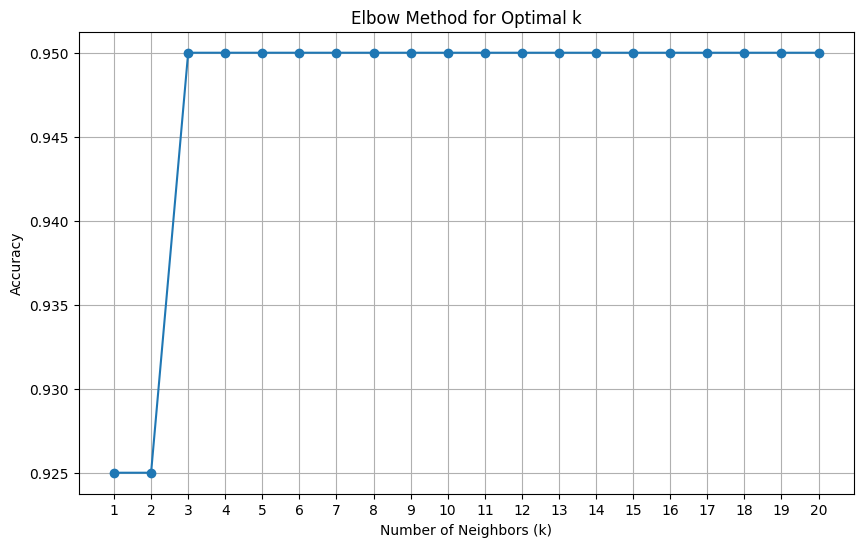

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
# Calculate and store accuracy
accuracy_linear = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_linear)

# Calculate and store precision
precision_linear = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print("Precision:", precision_linear)

# Calculate and store recall
recall_linear = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print("Recall:", recall_linear)

# Calculate and store F1 score
f1_linear = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print("F1 Score:", f1_linear)

Accuracy: 0.95
Precision: 0.9526785714285714
Recall: 0.95
F1 Score: 0.950648360030511


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
#Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_linear = svm_linear.predict(X_test_scaled)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy:", accuracy_linear)
precision_linear = precision_score(y_test, y_pred_linear)
print("Precision:", precision_linear)
recall_linear = recall_score(y_test, y_pred_linear)
print("Recall:", recall_linear)
f1_linear = f1_score(y_test, y_pred_linear)
print("F1 Score:",f1_linear)

Accuracy: 0.875
Precision: 0.95
Recall: 0.6785714285714286
F1 Score: 0.7916666666666666


Text(0.5, 1.0, 'confusion matrix')

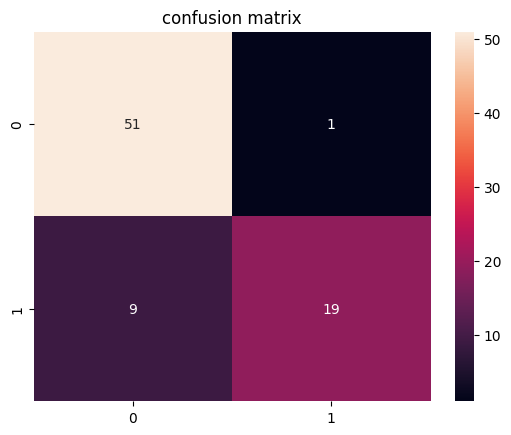

In [ ]:
cm = confusion_matrix(y_test,y_pred_linear)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")

In [ ]:
#polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [ ]:
y_pred_poly = svm_poly.predict(X_test_scaled)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy:", accuracy_poly)
precision_poly = precision_score(y_test, y_pred_poly)
print("Precision:", precision_poly)
recall_poly = recall_score(y_test, y_pred_poly)
print("Recall:", recall_poly)
f1_poly = f1_score(y_test, y_pred_poly)
print("F1 Score:",f1_poly)

Accuracy: 0.9125
Precision: 0.8620689655172413
Recall: 0.8928571428571429
F1 Score: 0.8771929824561403


Text(0.5, 1.0, 'confusion matrix')

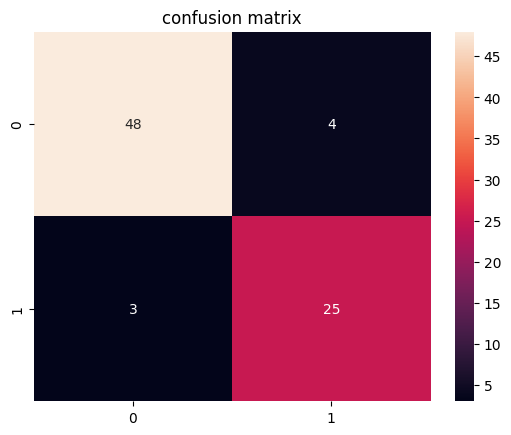

In [ ]:
cm = confusion_matrix(y_test,y_pred_poly)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")

In [ ]:
# Gaussian (RBF)
svm_rbf = SVC(kernel='rbf',gamma=0.1)
svm_rbf.fit(X_train_scaled, y_train)

SVC(gamma=0.1)

In [ ]:
y_pred_rbf = svm_rbf.predict(X_test_scaled)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy:", accuracy_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
print("Precision:", precision_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
print("Recall:", recall_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)
print("F1 Score:",f1_rbf)

Accuracy: 0.825
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666


Text(0.5, 1.0, 'confusion matrix')

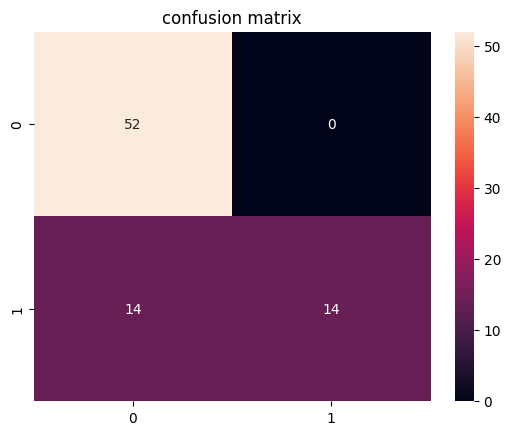

In [ ]:
cm = confusion_matrix(y_test,y_pred_rbf)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")

In [ ]:
# Sigmoid
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train_scaled, y_train)

SVC(kernel='sigmoid')

In [ ]:
y_pred_sigmoid = svm_sigmoid.predict(X_test_scaled)

accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print("Accuracy:", accuracy_sigmoid)
precision_sigmoid = precision_score(y_test, y_pred_sigmoid)
print("Precision:", precision_sigmoid)
recall_sigmoid = recall_score(y_test, y_pred_sigmoid)
print("Recall:", recall_sigmoid)
f1_sigmoid = f1_score(y_test, y_pred_sigmoid)
print("F1 Score:",f1_sigmoid)

Accuracy: 0.425
Precision: 0.09090909090909091
Recall: 0.07142857142857142
F1 Score: 0.08


Text(0.5, 1.0, 'confusion matrix')

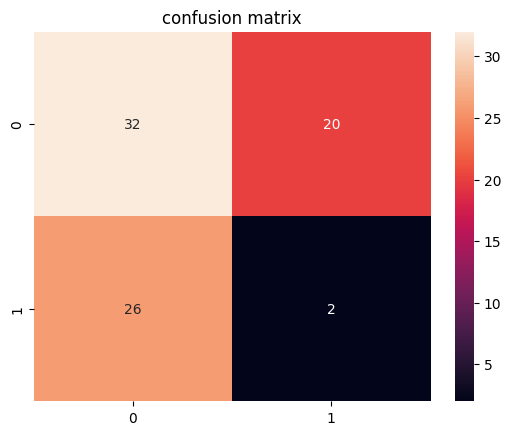

In [ ]:
cm = confusion_matrix(y_test,y_pred_sigmoid)
sns.heatmap(cm, annot=True, fmt='d').set_title("confusion matrix")